In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('dataset.csv')

In [2]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
print('Number of rows in the dataset: ',data.shape[0])
print('Number of columns in the dataset: ',data.shape[1])

Number of rows in the dataset:  303
Number of columns in the dataset:  14


In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


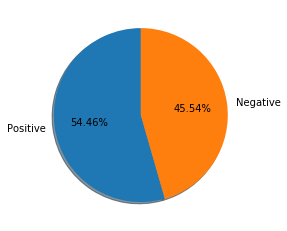

In [8]:
class_True = len(data[data.target == 1])
class_False = len(data[data.target == 0])
plt.pie(x=[class_True, class_False], explode=(0, 0), labels=['Positive', 'Negative'], autopct='%1.2f%%', shadow=True, startangle=90)
plt.show()

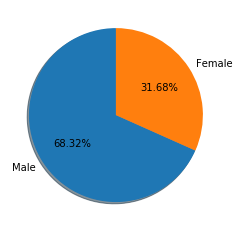

In [9]:
male = len(data[data.sex == 1])
female = len(data[data.sex == 0])
plt.pie(x=[male, female], explode=(0, 0), labels=['Male', 'Female'], autopct='%1.2f%%', shadow=True, startangle=90)
plt.show()

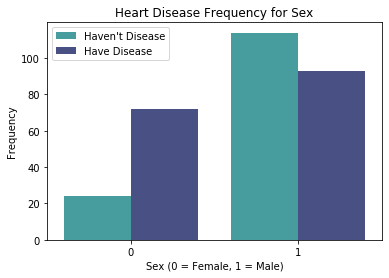

In [10]:
sns.countplot('sex',hue='target', data=data, palette='mako_r')
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

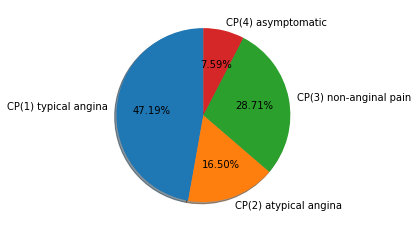

In [11]:
x = [len(data[data['cp'] == 0]),len(data[data['cp'] == 1]), len(data[data['cp'] == 2]), len(data[data['cp'] == 3])]
plt.pie(x, data=data, labels=['CP(1) typical angina', 'CP(2) atypical angina', 'CP(3) non-anginal pain', 'CP(4) asymptomatic'], autopct='%1.2f%%', shadow=True,startangle=90)
plt.show()

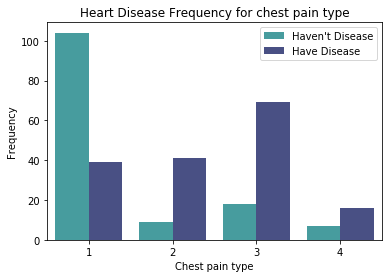

In [12]:
sns.countplot('cp',hue='target', data=data, palette='mako_r')
plt.title('Heart Disease Frequency for chest pain type')
plt.xlabel('Chest pain type')
plt.xticks(np.arange(4), [1, 2, 3, 4], rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

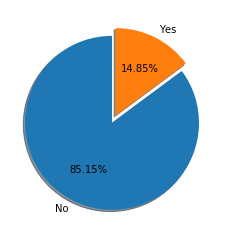

In [13]:
sizes = [len(data[data.fbs == 0]), len(data[data.fbs==1])]
labels = ['No', 'Yes']
plt.pie(x=sizes, labels=labels, explode=(0.1, 0), autopct="%1.2f%%", startangle=90,shadow=True)
plt.show()

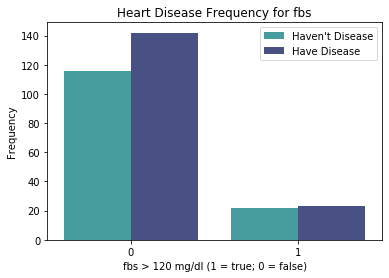

In [14]:
sns.countplot('fbs', hue='target', data=data, palette='mako_r')
plt.title('Heart Disease Frequency for fbs')
plt.xticks(rotation=0)
plt.xlabel('fbs > 120 mg/dl (1 = true; 0 = false)')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

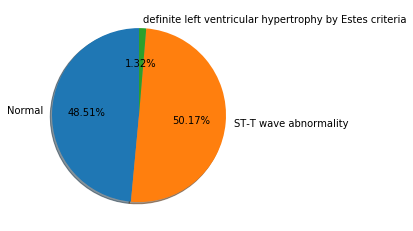

In [15]:
sizes = [len(data[data.restecg == 0]), len(data[data.restecg==1]), len(data[data.restecg==2])]
labels = ['Normal', 'ST-T wave abnormality', 'definite left ventricular hypertrophy by Estes criteria']
plt.pie(x=sizes, labels=labels, explode=(0, 0, 0), autopct="%1.2f%%", startangle=90,shadow=True)
plt.show()

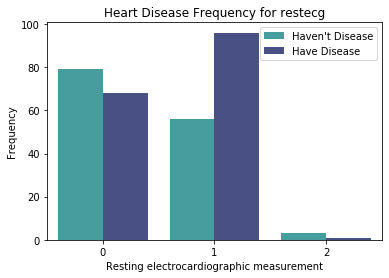

In [16]:
sns.countplot('restecg', hue='target', data=data, palette='mako_r')
plt.title('Heart Disease Frequency for restecg')
plt.xlabel('Resting electrocardiographic measurement')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

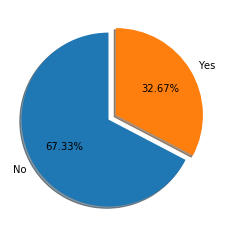

In [17]:
sizes = [len(data[data.exang == 0]), len(data[data.exang==1])]
labels = ['No', 'Yes']
plt.pie(x=sizes, labels=labels, explode=(0.1, 0), autopct="%1.2f%%", startangle=90,shadow=True)
plt.show()

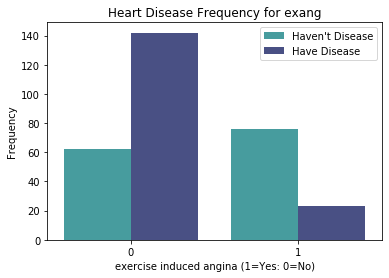

In [18]:
sns.countplot('exang', hue='target', data=data, palette='mako_r')
plt.title('Heart Disease Frequency for exang')
plt.xlabel('exercise induced angina (1=Yes: 0=No)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

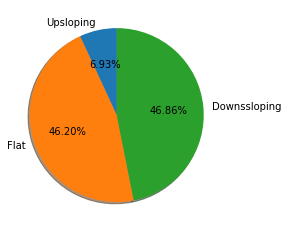

In [19]:
sizes = [len(data[data.slope == 0]), len(data[data.slope==1]), len(data[data.slope==2])]
labels = ['Upsloping', 'Flat', 'Downssloping']
plt.pie(x=sizes, labels=labels, explode=(0, 0, 0), autopct="%1.2f%%", startangle=90,shadow=True)
plt.show()

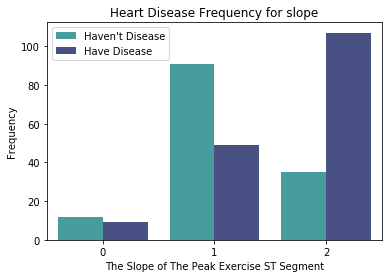

In [20]:
sns.countplot('slope', hue='target', data=data, palette='mako_r')
plt.title('Heart Disease Frequency for slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

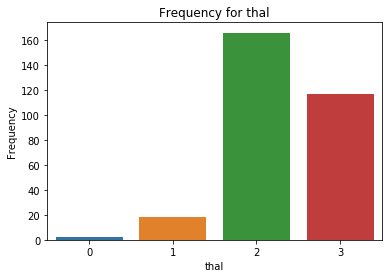

In [21]:
sns.countplot('thal', data=data)
plt.title('Frequency for thal')
plt.ylabel('Frequency')
plt.show()

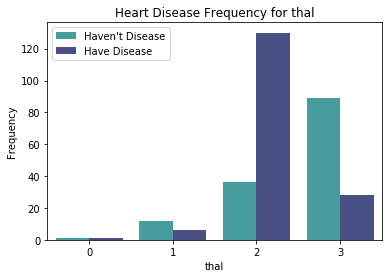

In [22]:
sns.countplot('thal', hue='target', data=data, palette='mako_r')
plt.title('Heart Disease Frequency for thal')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

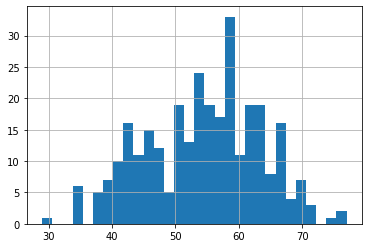

In [23]:
data.age.hist(bins=30)
plt.show()

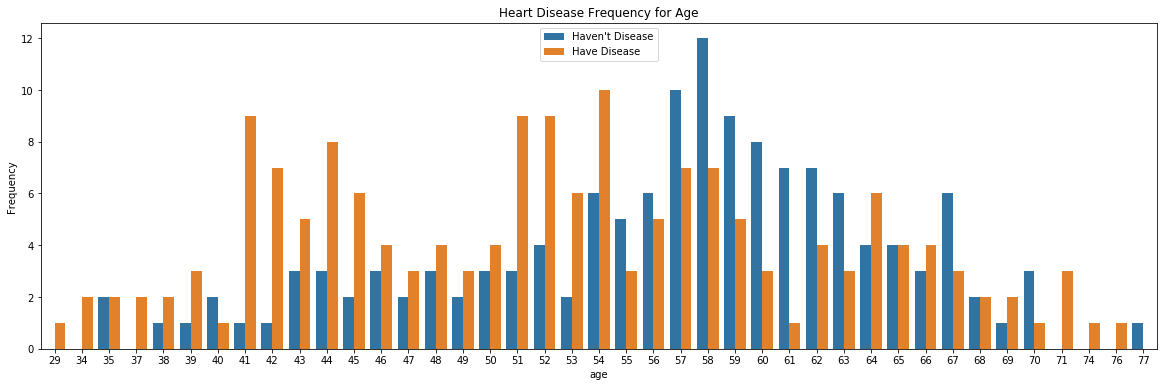

In [24]:
plt.figure(figsize=(20, 6))
sns.countplot('age', hue='target', data=data)
plt.title('Heart Disease Frequency for Age')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

[]

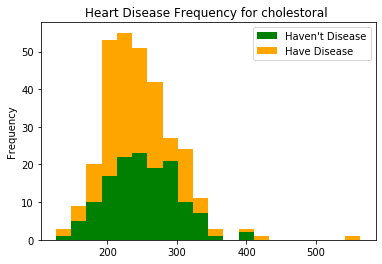

In [25]:
plt.hist([data.chol[data.target==0], data.chol[data.target==1]], bins=20,color=['green', 'orange'], stacked=True)
plt.legend(["Haven't Disease", "Have Disease"])
plt.title('Heart Disease Frequency for cholestoral ')
plt.ylabel('Frequency')
plt.plot()

[]

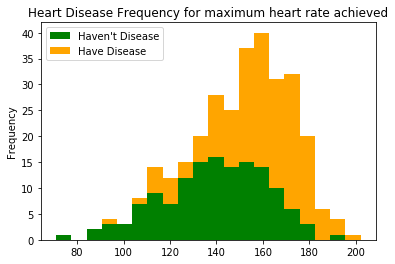

In [26]:
plt.hist([data.thalach[data.target==0], data.thalach[data.target==1]], bins=20,color=['green', 'orange'], stacked=True)
plt.legend(["Haven't Disease", "Have Disease"])
plt.title('Heart Disease Frequency for maximum heart rate achieved')
plt.ylabel('Frequency')
plt.plot()

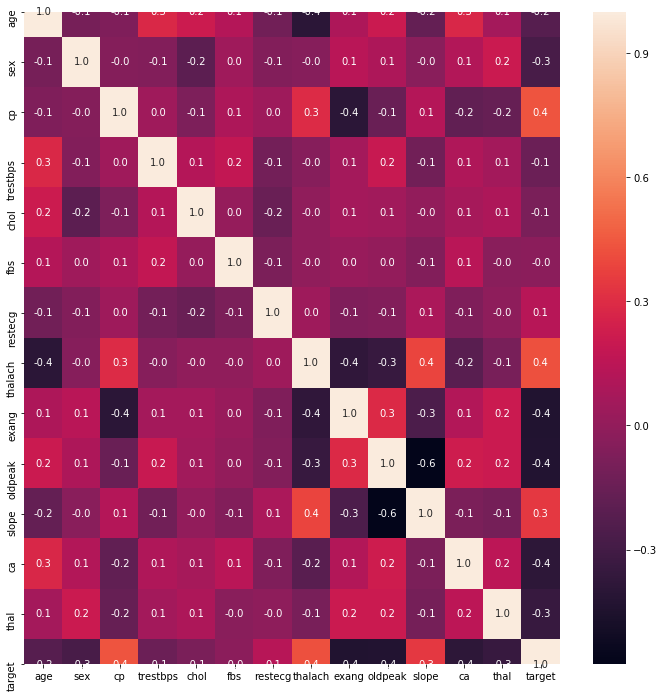

In [27]:
plt.figure(figsize=(12, 12))
sns.heatmap(data.corr(), annot=True, fmt='.1f')
plt.show()

In [28]:
#Data Preprocessing¶
#Datasets contains Categorical Data so we have to create dummy variables.
#'cp', 'thal' and 'slope' are categorical variables

In [29]:
cp = pd.get_dummies(data['cp'], prefix = "cp", drop_first=True)
thal = pd.get_dummies(data['thal'], prefix = "thal" , drop_first=True)
slope = pd.get_dummies(data['slope'], prefix = "slope", drop_first=True)

In [30]:
cp

,cp_1,cp_2,cp_3
0,0,0,1
1,0,1,0
2,1,0,0
3,1,0,0
4,0,0,0
...,...,...,...
298,0,0,0
299,0,0,1
300,0,0,0
301,0,0,0


In [34]:
#We use drop_first to get k-1 dummies out of k categorical levels by removing the first level.

In [31]:
new_data = pd.concat([data, cp, thal, slope], axis=1)
new_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,thal,target,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,1,1,0,0,1,1,0,0,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,2,1,0,1,0,0,1,0,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,2,1,1,0,0,0,1,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,2,1,1,0,0,0,1,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,2,1,0,0,0,0,1,0,0,1


In [32]:
new_data.drop(['cp', 'thal', 'slope'], axis=1, inplace=True)
new_data.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,1,0,0,1,1,0,0,0,0
1,37,1,130,250,0,1,187,0,3.5,0,1,0,1,0,0,1,0,0,0
2,41,0,130,204,0,0,172,0,1.4,0,1,1,0,0,0,1,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,1,1,0,0,0,1,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,1,0,0,0,0,1,0,0,1


In [33]:
# removing target columns from dataset
X = new_data.drop(['target'], axis=1)
y = new_data.target

In [34]:
print(X.shape)

(303, 18)


In [35]:
#Normalize the data
X = (X - X.min())/(X.max()-X.min())
X.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_1,slope_2
0,0.708333,1.0,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.166667,1.0,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.250000,0.0,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.562500,1.0,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.583333,0.0,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [36]:
#We will split our data. 80% of our data will be train data and 20% of it will be test data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [37]:
#Train the Models

In [38]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
# checking the score at test data
lr.score(X_test, y_test)

0.9016393442622951

[]

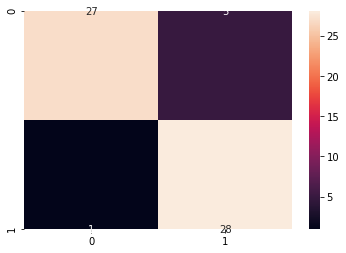

In [39]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, lr.predict(X_test))
sns.heatmap(cm, annot=True)
plt.plot()

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
# Setting parameters for GridSearchCV
params = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
         'class_weight':['balanced',None]}
lr_model = GridSearchCV(lr,param_grid=params,cv=10)

In [42]:
lr_model.fit(X_train,y_train)


C:\Users\Prem\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Prem\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Prem\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Prem\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\Prem\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-tes

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2']})

In [43]:
lr = LogisticRegression(C=1, penalty='l2')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9016393442622951

In [44]:
# measure the quality of predictions
from sklearn.metrics import auc, classification_report
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.84      0.90        32
           1       0.85      0.97      0.90        29

    accuracy                           0.90        61
   macro avg       0.91      0.90      0.90        61
weighted avg       0.91      0.90      0.90        61



In [45]:
#Support Vector Machine
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.9016393442622951

In [46]:
#Gaussian NB
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
nb.score(X_test, y_test)

0.9344262295081968

[]

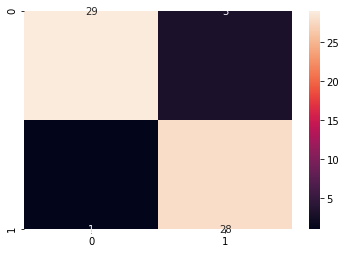

In [47]:
cm = confusion_matrix(y_test, nb.predict(X_test))
sns.heatmap(cm, annot=True)
plt.plot()

In [48]:
# measure the quality of predictions
print(classification_report(y_test, nb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        32
           1       0.90      0.97      0.93        29

    accuracy                           0.93        61
   macro avg       0.93      0.94      0.93        61
weighted avg       0.94      0.93      0.93        61



In [49]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators':list(range(10,30)),
         'max_depth':list(range(1,7))}
rf_model = GridSearchCV(RandomForestClassifier(),param_grid=params,cv=10)
rf_model.fit(X_train,y_train)
rf_model.best_params_ 

{'max_depth': 6, 'n_estimators': 29}

In [50]:
rfc = RandomForestClassifier(max_depth= 3, n_estimators= 17, random_state=2)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.9016393442622951

[]

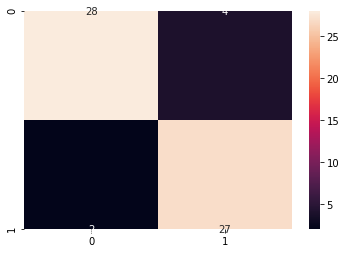

In [51]:
cm = confusion_matrix(y_test, rfc.predict(X_test))
sns.heatmap(cm, annot=True)
plt.plot()

In [52]:
# measure the quality of predictions
print(classification_report(y_test, rfc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        32
           1       0.87      0.93      0.90        29

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [53]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbc.score(X_test, y_test)

0.8852459016393442

[]

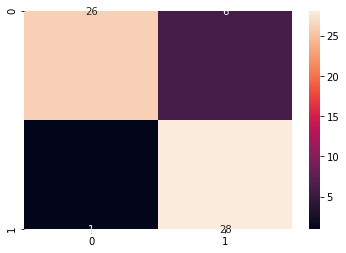

In [54]:
cm = confusion_matrix(y_test, gbc.predict(X_test))
sns.heatmap(cm, annot=True)
plt.plot()

In [55]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost
XGB_classifier = xgboost.XGBClassifier()
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

C:\Users\Prem\Anaconda3\lib\site-packages\distributed\utils.py:133: RuntimeWarning: Couldn't detect a suitable IP address for reaching '8.8.8.8', defaulting to '127.0.0.1': [WinError 10065] A socket operation was attempted to an unreachable host
  RuntimeWarning,


In [57]:
random_search = RandomizedSearchCV(XGB_classifier, param_distributions=params, n_iter=5, 
                                   scoring='roc_auc', n_jobs=-1,cv=5,verbose=3)

In [58]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:   12.2s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   12.3s finished


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=No

In [59]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=8,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [62]:
XGB_classifier = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=8,
              min_child_weight=5, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [65]:
XGB_classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=8,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [66]:
XGB_classifier.score(X_test,y_test)

0.9016393442622951

[]

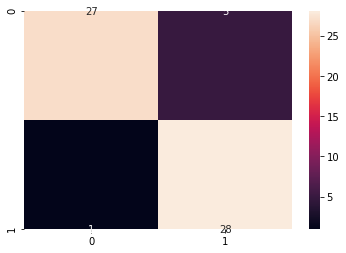

In [67]:
cm = confusion_matrix(y_test, XGB_classifier.predict(X_test))
sns.heatmap(cm, annot=True)
plt.plot()

In [68]:
#All Algo's Score
algo = ['LogisticRegression', 'SVM', 'RandomForest', 'GaussianNB', 'GradientBoosting','XGBoost']
score = [al.score(X_test, y_test) for al in [lr, svc,rfc, nb, gbc,XGB_classifier]] 

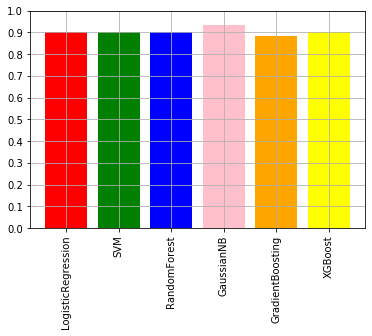

In [69]:
plt.grid()
plt.bar(x=algo, height=score, color=['red','green','b','pink','orange','yellow'])
plt.xticks(rotation=90)
plt.ylim((0,1))
plt.yticks(np.arange(0,1.1,0.1))
plt.show()